# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Import the file 'turnstile_180901.txt'
df_data = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df_data.shape)

# Print the first five rows of df
df_data.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [55]:
#mine
df_data[678:685]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
678,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/25/2018,10:00:00,REGULAR,7429491,3245345
679,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/25/2018,14:00:00,REGULAR,7429553,3245408
680,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/25/2018,18:00:00,REGULAR,7429785,3245474
681,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/25/2018,22:00:00,REGULAR,7430012,3245501
682,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/26/2018,02:00:00,REGULAR,7430044,3245503
683,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/26/2018,06:00:00,REGULAR,7430047,3245505
684,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,08/26/2018,10:00:00,REGULAR,7430061,3245520


Rename all the columns to lower case: 

In [56]:
df_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [58]:
# Rename all the columns to lower case
df_data.columns = map(str.lower, df_data.columns)

In [86]:
df_data.head(2)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


Change the index to `'linename'`: 

In [113]:
"""
I tried to set linename to index and then I couldn't use it as a column
"""
# Change the index to 'linename'
#df = df.set_index('linename')
print('Comment')

Comment


In [91]:
df_data_amend = df_data.copy()

In [92]:
df_data_amend.head(1)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184


In [93]:
#df_amend = df_amend.set_index('linename')

Remove the index: 

In [69]:
# Remove the index
#df_amend.reset_index(drop=True)

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [95]:
df_data_amend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
c/a                                                                     197625 non-null object
unit                                                                    197625 non-null object
scp                                                                     197625 non-null object
station                                                                 197625 non-null object
linename                                                                197625 non-null object
division                                                                197625 non-null object
date                                                                    197625 non-null object
time                                                                    197625 non-null object
desc                                                                    197625 non-null object
entries                           

In [96]:
#mine
df_data_amend[197621:]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348
197624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,21:00:00,REGULAR,5554,348


In [97]:
# Add a new 'num_lines' column
#df.str.len()
df_data_amend['Num_Lines'] = df_data_amend['linename'].astype(str).map(len)

In [98]:
df_data_amend.head(2)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7


In [99]:
df_data_amend['Num_Lines']

0         7
1         7
2         7
3         7
4         7
5         7
6         7
7         7
8         7
9         7
10        7
11        7
12        7
13        7
14        7
15        7
16        7
17        7
18        7
19        7
20        7
21        7
22        7
23        7
24        7
25        7
26        7
27        7
28        7
29        7
         ..
197595    1
197596    1
197597    1
197598    1
197599    1
197600    1
197601    1
197602    1
197603    1
197604    1
197605    1
197606    1
197607    1
197608    1
197609    1
197610    1
197611    1
197612    1
197613    1
197614    1
197615    1
197616    1
197617    1
197618    1
197619    1
197620    1
197621    1
197622    1
197623    1
197624    1
Name: Num_Lines, Length: 197625, dtype: int64

In [100]:
#df_drop_index = df_amend.reset_index(drop=True)

In [101]:
df_data_amend.sort_values(by='Num_Lines', ascending=False)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
132292,R151,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
2676,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,04:00:00,REGULAR,2832359,3306438,12
2677,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,08:00:00,REGULAR,2832561,3306716,12
2678,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,09:57:08,REGULAR,2832815,3307705,12
2679,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,12:00:00,REGULAR,2832994,3308064,12
2680,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,16:00:00,REGULAR,2833390,3308536,12


In [104]:
#my comment, w/o sort it reverts back to unsorted
df_data_amend.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


Write a function to clean column names: 

In [107]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = None
    return cleaned

In [108]:
def clean(col_name):
    clean = col_name.title()
    return clean


In [110]:
# Use the above function to clean the column names
df_data_amend.columns = [clean(col) for col in df_data_amend.columns]

In [111]:
# Check to ensure the column names were cleaned
df_data_amend.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [112]:
df_data_amend.head()

,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [114]:
#Date is a string
df_data_amend['Date'].dtype

dtype('O')

In [123]:
# Convert the data type of the 'date' column to a date

# Add a new column 'day_of_week' that represents the day of the week 
df_data_amend['Date'] = pd.to_datetime(df_data_amend['Date'])

In [126]:
df_data_amend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 12 columns):
C/A                                                                     197625 non-null object
Unit                                                                    197625 non-null object
Scp                                                                     197625 non-null object
Station                                                                 197625 non-null object
Linename                                                                197625 non-null object
Division                                                                197625 non-null object
Date                                                                    197625 non-null datetime64[ns]
Time                                                                    197625 non-null object
Desc                                                                    197625 non-null object
Entries                   

In [152]:
# Add a new column 'day_of_week' that represents the day of the week 
df_data_amend['day_of_week'] = df_data_amend['Date'].dt.dayofweek

In [153]:
df_data_amend.head(10)

,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,Num_Lines,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,5
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,6
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,6
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,6
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,6


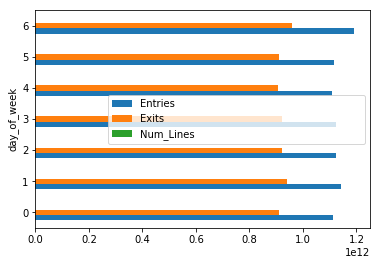

In [154]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df_data_amend.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [155]:
grouped

,Entries,Exits,Num_Lines
day_of_week,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573
5,1115661545514,909142081474,74725
6,1192306179082,959223750461,75306


In [156]:
grouped_df = grouped.copy()

In [157]:
# Reset the index of grouped
grouped_df = grouped_df.reset_index()


In [158]:
# Print the first five rows of grouped
grouped_df

,day_of_week,Entries,Exits,Num_Lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573
5,5,1115661545514,909142081474,74725
6,6,1192306179082,959223750461,75306


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [159]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped_df['is_weekend'] = grouped_df['day_of_week'].map(weekend_map)

In [160]:
grouped_df.head()

,day_of_week,Entries,Exits,Num_Lines,is_weekend
0,0,1114237052454,911938153513,76110,False
1,1,1143313287046,942230721477,77303,False
2,2,1123655222441,920630864687,75713,False
3,3,1122723988662,920691927110,76607,False
4,4,1110224700078,906799065337,75573,False


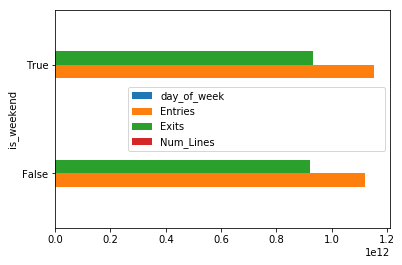

In [163]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped_df.groupby('is_weekend').mean()
wkend.plot(kind='barh')
#wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [167]:
# Remove the 'c/a' and 'scp' columns
df = df_data_amend.copy()
df.drop(['C/A','Scp'], axis=1, inplace=True) 

df.head(2)

,Unit,Station,Linename,Division,Date,Time,Desc,Entries,Exits,Num_Lines,day_of_week
0,R051,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,R051,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

Great! You practiced your data cleanup skills using Pandas.